# Assignment 4
Letter Recognition - http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/

German Data - https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

Wine Quality - https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Student - https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

### Importing libs

In [71]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [28]:
def Statistics(name,dataSet) :
    print('\033[1m' + '\n\nStatistics for'  + name + '\033[0m')
    print(dataSet.describe(include='all'))
    print('\033[1m' + "Median" + '\033[0m' ,dataSet.median(),sep="\n")
    print('\033[1m' + "Mode" + '\033[0m' ,dataSet.mode(),sep="\n")
    print('\033[1m' + "Variance" + '\033[0m' ,dataSet.var(),sep="\n")
    print('\033[1m' + "Skewness" + '\033[0m' ,dataSet.skew(),sep="\n")
    print('\033[1m' + "Kurtosis" + '\033[0m' ,dataSet.kurtosis(),sep="\n")

In [69]:
def confusionMatrix(y_test,y_predict) :
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
    
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(26, 26), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
def error() :
    pass

In [72]:
def SVM(X_train,X_test,y_train,y_test) :
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_test)
    print(classification_report(y_test,y_predict))
    confusionMatrix(y_test,y_predict)
    plt.scatter(X_train[:,2],X_train[:,4],c=y_train,cmap='winter')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.scatter(X_test[:,'A'],X_test[:,'B'],c=y_test,cmap='winter',marker='s')

    w = classifier.coef_[0]
    a = -w[0]/w[1]
    xx = np.linspace(xlim[0],xlim[1])
    # yy = np.linspace(ylim[1],ylim[0])
    yy = a * xx - (classifier.intercept_[0] / w[1])
    plt.plot(xx,yy)

In [ ]:

def DecisionTree() :
    pass
def NN() :
    pass
def RandomForest() :
    pass

## Letter Recognitition

/home/jay/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           A       0.91      0.95      0.93       167
           B       0.80      0.86      0.83       137
           C       0.83      0.88      0.85       148
           D       0.79      0.90      0.84       153
           E       0.83      0.83      0.83       158
           F       0.80      0.88      0.84       138
           G       0.75      0.76      0.75       160
           H       0.67      0.60      0.64       141
           I       0.91      0.91      0.91       162
           J       0.85      0.82      0.84       141
           K       0.80      0.83      0.82       161
           L       0.90      0.85      0.87       138
           M       0.93      0.93      0.93       160
           N       0.94      0.89      0.91       163
           O       0.86      0.75      0.80       165
           P       0.90      0.85      0.87       164
           Q       0.85      0.81      0.83       162
           R       0.76    

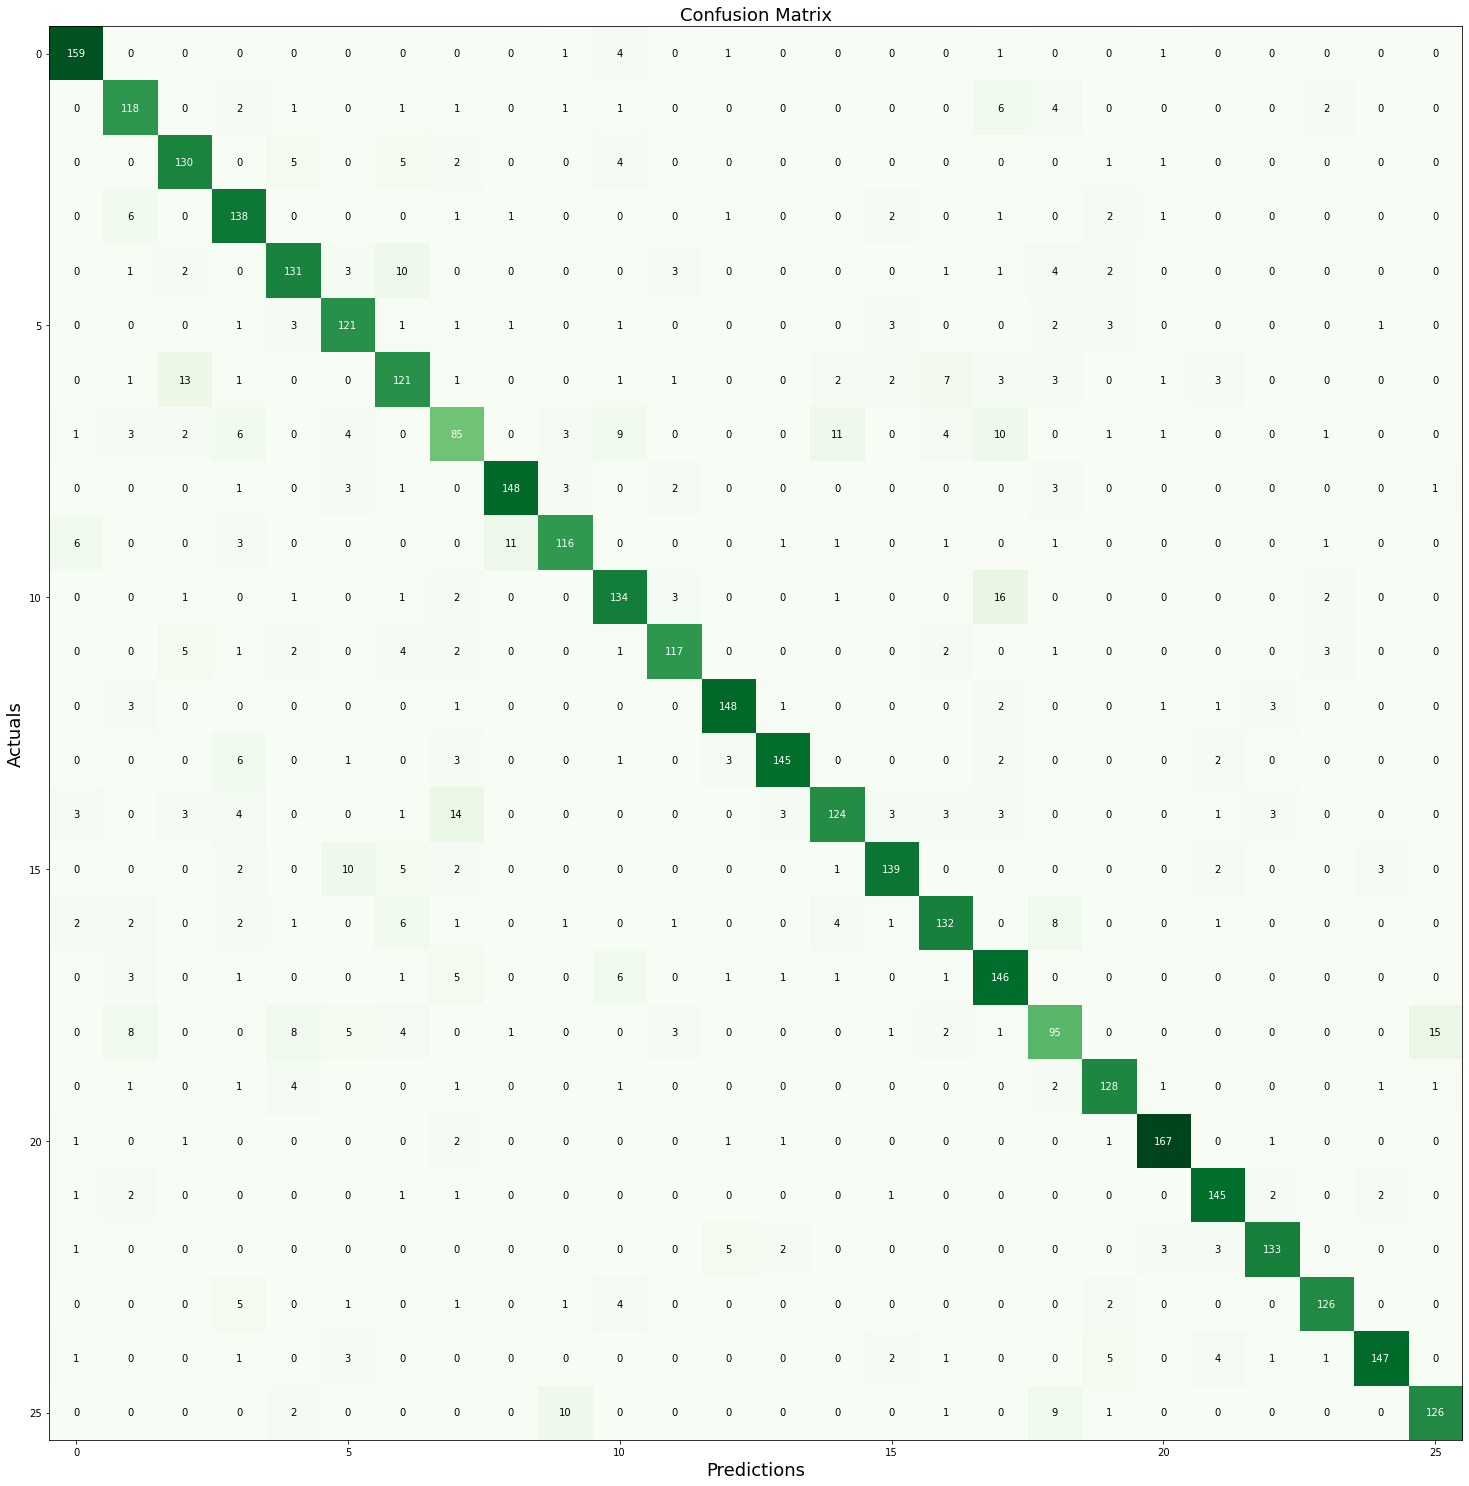

TypeError: '(slice(None, None, None), 2)' is an invalid key

In [73]:
letter_recognition_dataSet = pd.read_csv('letter-recognition/letter-recognition.data')
letter_recognition_dataSet.head()
X = letter_recognition_dataSet.iloc[:,1:]
Y = letter_recognition_dataSet.iloc[:,0:1]
# Statistics("letter_recognition_dataSet",X)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
SVM(X_train,X_test,y_train,y_test)

## German 

In [50]:
german_dataSet = pd.read_csv('german/german.data',sep=' ')
# german_dataSet.head()

## Wine Quality (Red and White)
Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.
We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [46]:
red_wine_quality_dataSet = pd.read_csv('wine/winequality-red.csv',sep=';')
red_wine_quality_dataSet.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
white_wine_quality_dataSet = pd.read_csv('wine/winequality-white.csv',sep=';')
white_wine_quality_dataSet.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Student Data (Maths and Portuguese) 
Student info and their performance in both the subjects. Grades G1, G2, and G3.

In [68]:
student_data_math = pd.read_csv('student/student-mat.csv')

In [69]:
student_data_portuguese = pd.read_csv('student/student-por.csv')